<a href="https://colab.research.google.com/github/arafathsiam99/NTK-Visualization-Framework/blob/main/NTK_Visualization_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NTK Matrix Shape: torch.Size([50, 50])


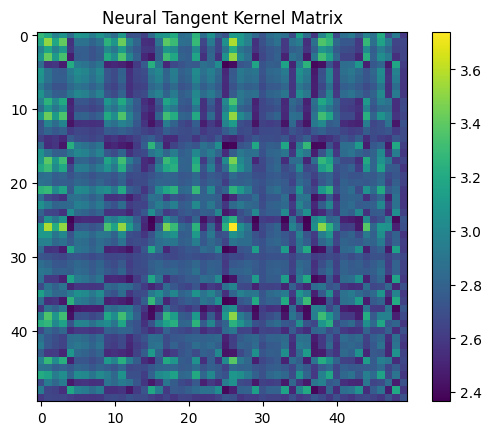

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_dim = 2
hidden_dim = 10
output_dim = 1
model = SimpleNN(input_dim, hidden_dim, output_dim)

torch.manual_seed(42)
X_train = torch.rand((50, input_dim))
y_train = torch.rand((50, output_dim))

def compute_ntk(model, X):
    """
    Compute the NTK matrix for a given model and input data X.
    """
    grads = []

    for x in X:
        model.zero_grad()
        y = model(x.unsqueeze(0))
        y.backward(torch.ones_like(y))

        # Flatten gradients and store them
        grad_vector = []
        for param in model.parameters():
            grad_vector.append(param.grad.view(-1))
        grads.append(torch.cat(grad_vector))

    grads = torch.stack(grads)

    ntk_matrix = grads @ grads.T
    return ntk_matrix

ntk_matrix = compute_ntk(model, X_train)
print("NTK Matrix Shape:", ntk_matrix.shape)

import matplotlib.pyplot as plt

plt.imshow(ntk_matrix.detach().numpy(), cmap="viridis")
plt.colorbar()
plt.title("Neural Tangent Kernel Matrix")
plt.show()
